In [2]:
import pandas as pd

In [3]:
df=pd.read_csv('Epileptic Seizure Recognition reaper.csv')

print(df.head(5))

      Unnamed   X1   X2   X3   X4   X5   X6   X7   X8   X9  ...  X170  X171  \
0  X21.V1.791  135  190  229  223  192  125   55   -9  -33  ...   -17   -15   
1  X15.V1.924  386  382  356  331  320  315  307  272  244  ...   164   150   
2     X8.V1.1  -32  -39  -47  -37  -32  -36  -57  -73  -85  ...    57    64   
3   X16.V1.60 -105 -101  -96  -92  -89  -95 -102 -100  -87  ...   -82   -81   
4   X20.V1.54   -9  -65  -98 -102  -78  -48  -16    0  -21  ...     4     2   

   X172  X173  X174  X175  X176  X177  X178  y  
0   -31   -77  -103  -127  -116   -83   -51  4  
1   146   152   157   156   154   143   129  1  
2    48    19   -12   -30   -35   -35   -36  5  
3   -80   -77   -85   -77   -72   -69   -65  5  
4   -12   -32   -41   -65   -83   -89   -73  5  

[5 rows x 180 columns]


In [4]:
df=df.drop('Unnamed',axis=1)
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,135,190,229,223,192,125,55,-9,-33,-38,...,-17,-15,-31,-77,-103,-127,-116,-83,-51,4
1,386,382,356,331,320,315,307,272,244,232,...,164,150,146,152,157,156,154,143,129,1
2,-32,-39,-47,-37,-32,-36,-57,-73,-85,-94,...,57,64,48,19,-12,-30,-35,-35,-36,5
3,-105,-101,-96,-92,-89,-95,-102,-100,-87,-79,...,-82,-81,-80,-77,-85,-77,-72,-69,-65,5
4,-9,-65,-98,-102,-78,-48,-16,0,-21,-59,...,4,2,-12,-32,-41,-65,-83,-89,-73,5


In [5]:
df.loc[df['y'] != 1, 'y'] = 0
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,135,190,229,223,192,125,55,-9,-33,-38,...,-17,-15,-31,-77,-103,-127,-116,-83,-51,0
1,386,382,356,331,320,315,307,272,244,232,...,164,150,146,152,157,156,154,143,129,1
2,-32,-39,-47,-37,-32,-36,-57,-73,-85,-94,...,57,64,48,19,-12,-30,-35,-35,-36,0
3,-105,-101,-96,-92,-89,-95,-102,-100,-87,-79,...,-82,-81,-80,-77,-85,-77,-72,-69,-65,0
4,-9,-65,-98,-102,-78,-48,-16,0,-21,-59,...,4,2,-12,-32,-41,-65,-83,-89,-73,0


<Axes: xlabel='y', ylabel='count'>

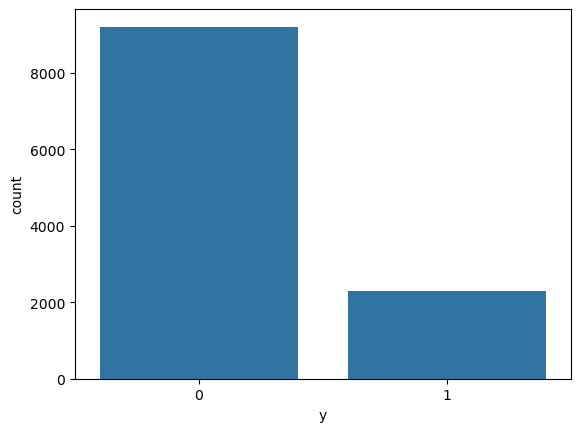

In [6]:
import seaborn as sns
sns.countplot(data=df, x='y')

In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt



# Split the dataset
X = df.drop('y',axis=1)  # Features
y = df['y']      # Labels

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.97      0.97      1835
           1       0.88      0.84      0.86       465

    accuracy                           0.94      2300
   macro avg       0.92      0.91      0.91      2300
weighted avg       0.94      0.94      0.94      2300



Fitting 5 folds for each of 72 candidates, totalling 360 fits

Best Parameters Found:
{'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10}

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.97      0.97      1835
           1       0.88      0.85      0.87       465

    accuracy                           0.95      2300
   macro avg       0.92      0.91      0.92      2300
weighted avg       0.95      0.95      0.95      2300



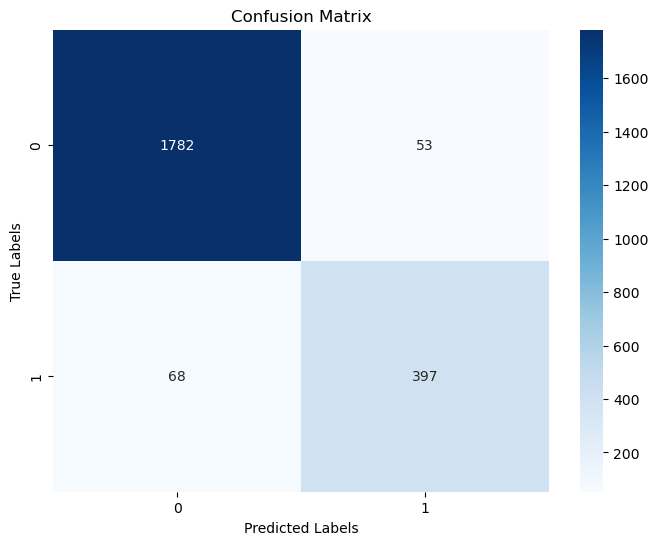

In [8]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Define the parameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],  # Splitting criterion
    'max_depth': [None, 5, 10, 20],  # Tree depth
    'min_samples_split': [2, 5, 10],  # Min samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]  # Min samples required at a leaf node
}

# Initialize the Decision Tree Classifier
dt = DecisionTreeClassifier(random_state=42)

# Perform Grid Search with Cross-Validation
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

# Best Hyperparameters
print("\nBest Parameters Found:")
print(grid_search.best_params_)

# Evaluate the Tuned Model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot Confusion Matrix
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


Fitting 5 folds for each of 243 candidates, totalling 1215 fits

Best Parameters Found:
{'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1835
           1       0.96      0.95      0.95       465

    accuracy                           0.98      2300
   macro avg       0.97      0.97      0.97      2300
weighted avg       0.98      0.98      0.98      2300



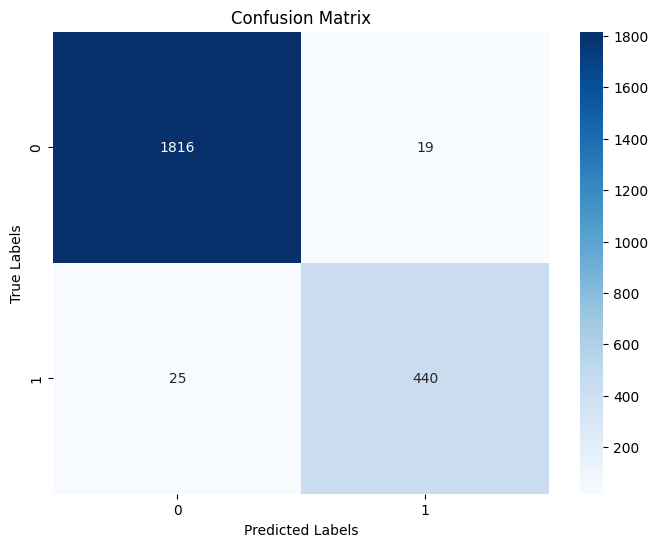

In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Define the parameter grid for Random Forest
param_grid = {
    'n_estimators': [50, 100, 200],            # Number of trees
    'max_depth': [None, 10, 20],               # Depth of each tree
    'min_samples_split': [2, 5, 10],           # Min samples to split an internal node
    'min_samples_leaf': [1, 2, 4],             # Min samples at a leaf node
    'max_features': ['sqrt', 'log2', None]     # Number of features to consider when looking for the best split
}

# Initialize the Random Forest Classifier
rf = RandomForestClassifier(random_state=42)

# Perform Grid Search with Cross-Validation
grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
grid_search_rf.fit(X_train, y_train)

# Best Hyperparameters
print("\nBest Parameters Found:")
print(grid_search_rf.best_params_)

# Evaluate the Tuned Model
best_rf_model = grid_search_rf.best_estimator_
y_pred = best_rf_model.predict(X_test)

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels') 
plt.show()



Classification Report (Training):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7365
           1       0.99      0.98      0.98      1835

    accuracy                           0.99      9200
   macro avg       0.99      0.99      0.99      9200
weighted avg       0.99      0.99      0.99      9200


Classification Report (Testing):
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1835
           1       0.95      0.93      0.94       465

    accuracy                           0.98      2300
   macro avg       0.96      0.96      0.96      2300
weighted avg       0.98      0.98      0.98      2300



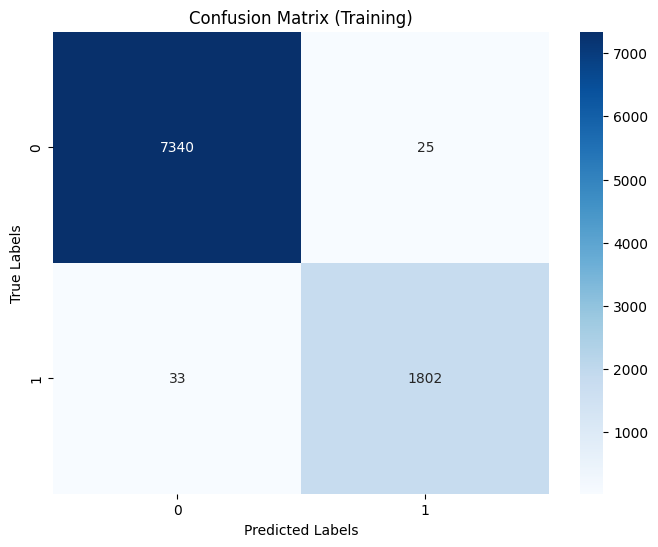

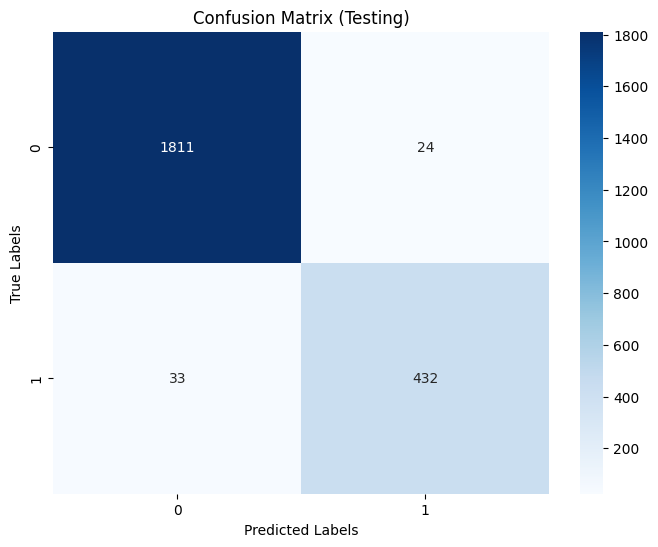

In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize the Random Forest Classifier with the best parameters
best_rf_model = RandomForestClassifier(
    max_depth=None,
    max_features='log2',
    min_samples_leaf=4,
    min_samples_split=10,
    n_estimators=100,
    random_state=42
)

# Train the model on the training set
best_rf_model.fit(X_train, y_train)

# Make predictions for training and testing data
y_train_pred = best_rf_model.predict(X_train)
y_test_pred = best_rf_model.predict(X_test)

# Classification Report for Training Set
print("\nClassification Report (Training):")
print(classification_report(y_train, y_train_pred))

# Classification Report for Testing Set
print("\nClassification Report (Testing):")
print(classification_report(y_test, y_test_pred))

# Plot Confusion Matrix for Training Set
conf_matrix_train = confusion_matrix(y_train, y_train_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_train, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title('Confusion Matrix (Training)')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Plot Confusion Matrix for Testing Set
conf_matrix_test = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title('Confusion Matrix (Testing)')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()



Fold 1 - Accuracy: 0.9648
Classification Report for Fold 1:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98      1840
           1       0.97      0.85      0.91       460

    accuracy                           0.96      2300
   macro avg       0.97      0.92      0.94      2300
weighted avg       0.97      0.96      0.96      2300


Fold 2 - Accuracy: 0.9626
Classification Report for Fold 2:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98      1840
           1       0.96      0.85      0.90       460

    accuracy                           0.96      2300
   macro avg       0.96      0.92      0.94      2300
weighted avg       0.96      0.96      0.96      2300


Fold 3 - Accuracy: 0.9583
Classification Report for Fold 3:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1840
           1       0.95      0.83      0.89       460


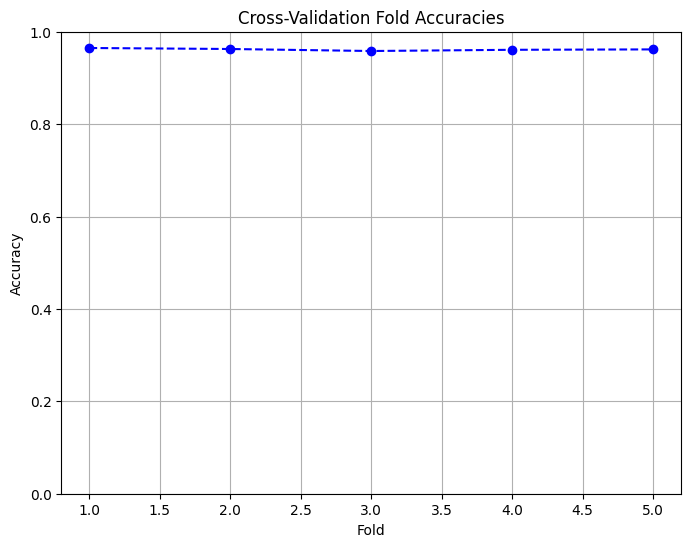

In [10]:
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np

# Parameters for the Random Forest model
rf_model = RandomForestClassifier(
    max_depth=10,
    max_features='sqrt',
    min_samples_leaf=5,
    min_samples_split=10,
    n_estimators=200,
    random_state=42
)

# Stratified K-Fold Cross Validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

fold_accuracies = []
fold_reports = []

for fold, (train_idx, test_idx) in enumerate(skf.split(X, y), 1):
    # Split the data
    X_train_fold, X_test_fold = X.iloc[train_idx], X.iloc[test_idx]
    y_train_fold, y_test_fold = y.iloc[train_idx], y.iloc[test_idx]

    # Train the model
    rf_model.fit(X_train_fold, y_train_fold)

    # Predict on the test fold
    y_pred_fold = rf_model.predict(X_test_fold)

    # Calculate accuracy for the current fold
    accuracy = accuracy_score(y_test_fold, y_pred_fold)
    fold_accuracies.append(accuracy)

    # Generate classification report
    report = classification_report(y_test_fold, y_pred_fold, output_dict=True)
    fold_reports.append(report)

    # Print results for this fold
    print(f"\nFold {fold} - Accuracy: {accuracy:.4f}")
    print(f"Classification Report for Fold {fold}:")
    print(classification_report(y_test_fold, y_pred_fold))

# Overall Metrics
mean_accuracy = np.mean(fold_accuracies)
std_accuracy = np.std(fold_accuracies)

print("\nOverall Cross-Validation Metrics:")
print(f"Mean Accuracy: {mean_accuracy:.4f}")
print(f"Standard Deviation of Accuracy: {std_accuracy:.4f}")

# Plot Fold Accuracies
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.plot(range(1, 6), fold_accuracies, marker='o', linestyle='--', color='b')
plt.title('Cross-Validation Fold Accuracies')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.grid(True)
plt.show()


Epoch 1/30


c:\Users\KIIT\Desktop\python\venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


288/288 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8482 - loss: 0.4524 - val_accuracy: 0.9704 - val_loss: 0.0829
Epoch 2/30
288/288 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9729 - loss: 0.0765 - val_accuracy: 0.9778 - val_loss: 0.0683
Epoch 3/30
288/288 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9790 - loss: 0.0635 - val_accuracy: 0.9774 - val_loss: 0.0675
Epoch 4/30
288/288 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9841 - loss: 0.0447 - val_accuracy: 0.9783 - val_loss: 0.0638
Epoch 5/30
288/288 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9856 - loss: 0.0417 - val_accuracy: 0.9809 - val_loss: 0.0633
Epoch 6/30
288/288 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9879 - loss: 0.0351 - val_accuracy: 0.9778 - val_loss: 0.0671
Epoch 7/30
288/288 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9894 - loss: 0.0294 - val_accuracy: 0.9783 - val_loss: 0.0665
Epoch 8/30
288/288 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9906 - loss: 0.0285 - val_accuracy: 0.9787 - val_

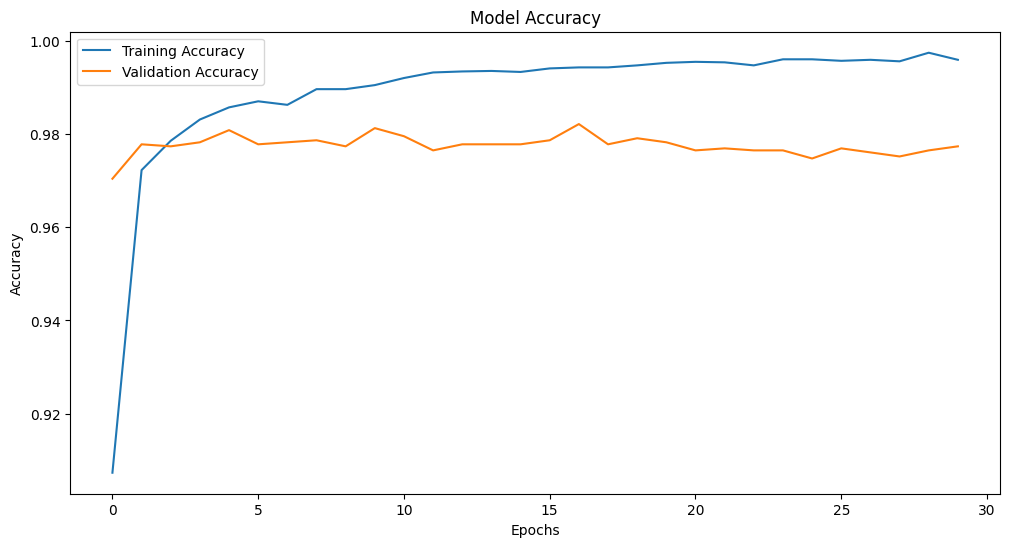

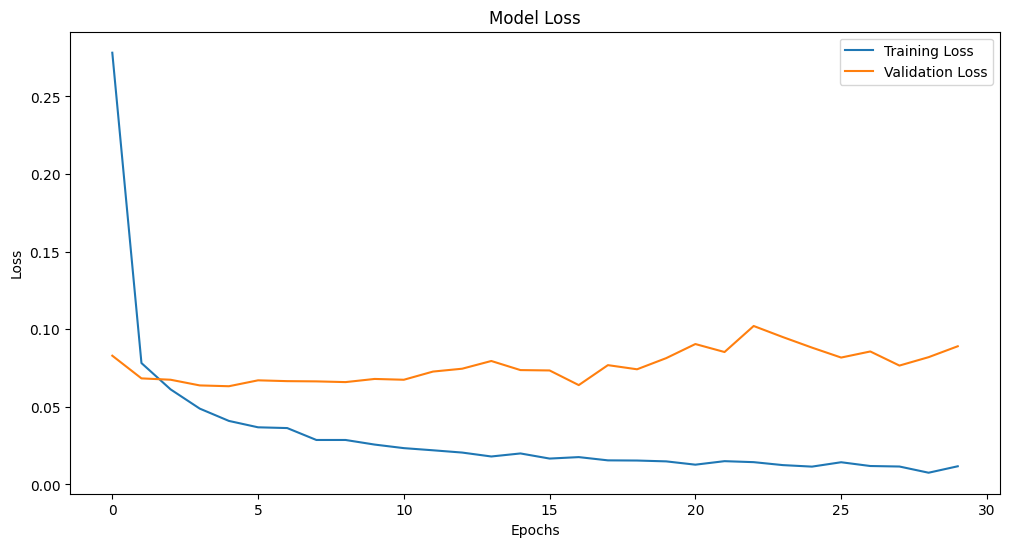

In [10]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential # type: ignore
from tensorflow.keras.layers import LSTM, Dense, Dropout # type: ignore
import matplotlib.pyplot as plt

# Assume `df` is your dataset with the target column 'Stage'

# Data Preparation
X = df.drop('y', axis=1).values  # Features
y = pd.get_dummies(df['y']).values  # One-hot encode labels

# Scale the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Reshape for LSTM (samples, timesteps, features)
X = X.reshape((X.shape[0], 1, X.shape[1]))

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define LSTM Model
model = Sequential([
    LSTM(64, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True),
    Dropout(0.2),
    LSTM(32),
    Dropout(0.2),
    Dense(16, activation='relu'),
    Dense(y.shape[1], activation='softmax')  # Output layer
])

# Compile the Model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the Model
history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Evaluate the Model
y_pred = model.predict(X_test)

# Convert predictions and true labels to scalar classes
y_pred_classes = np.argmax(y_pred, axis=1)  # Predicted classes
y_test_classes = np.argmax(y_test, axis=1)  # True classes

# Classification Report
print("\nClassification Report:")

print(classification_report(y_test_classes, y_pred_classes, target_names=['0', '1']))


# Confusion Matrix
conf_matrix = confusion_matrix(y_test_classes, y_pred_classes)
print("\nConfusion Matrix:")
print(conf_matrix)

# Plot Training and Validation Accuracy
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot Training and Validation Loss
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


Epoch 1/50


c:\Users\KIIT\Desktop\python\venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


288/288 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8405 - loss: 0.4784 - val_accuracy: 0.9704 - val_loss: 0.0875
Epoch 2/50
288/288 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9715 - loss: 0.0900 - val_accuracy: 0.9748 - val_loss: 0.0715
Epoch 3/50
288/288 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9812 - loss: 0.0547 - val_accuracy: 0.9739 - val_loss: 0.0768
Epoch 4/50
288/288 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9821 - loss: 0.0475 - val_accuracy: 0.9748 - val_loss: 0.0718
Epoch 5/50
288/288 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9885 - loss: 0.0351 - val_accuracy: 0.9778 - val_loss: 0.0670
Epoch 6/50
288/288 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9893 - loss: 0.0296 - val_accuracy: 0.9791 - val_loss: 0.0656
Epoch 7/50
288/288 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9928 - loss: 0.0259 - val_accuracy: 0.9796 - val_loss: 0.0662
Epoch 8/50
288/288 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9903 - loss: 0.0251 - val_accuracy: 0.9752 - val_

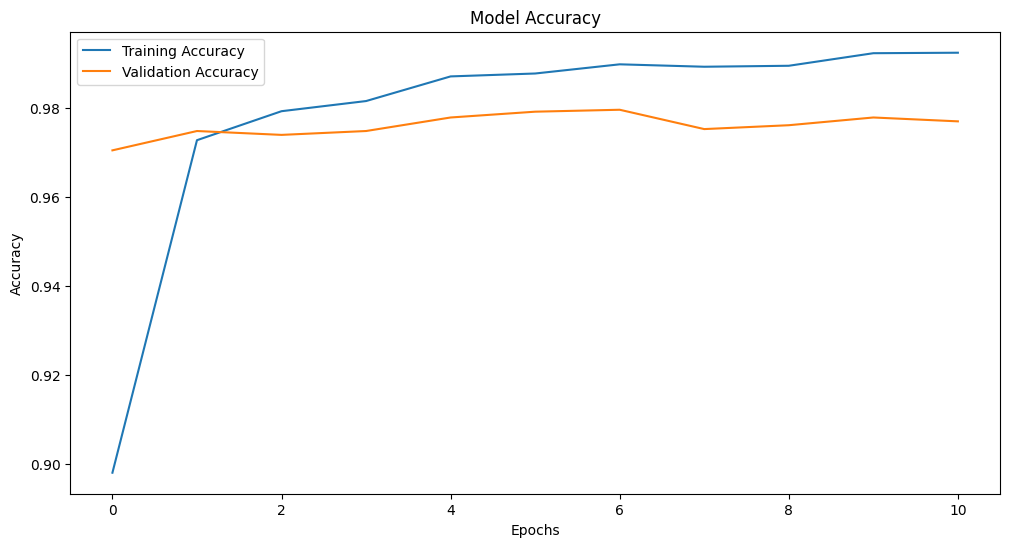

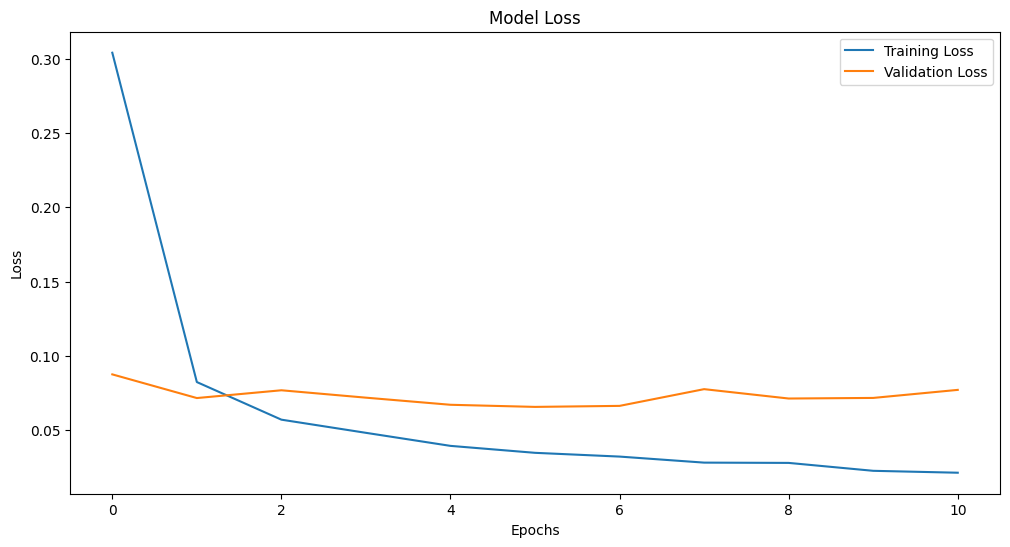

In [9]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential # type: ignore
from tensorflow.keras.layers import LSTM, Dense, Dropout # type: ignore
from tensorflow.keras.callbacks import EarlyStopping # type: ignore
import matplotlib.pyplot as plt

# Assume `df` is your dataset with the target column 'Stage'

# Data Preparation
X = df.drop('y', axis=1).values  # Features
y = pd.get_dummies(df['y']).values  # One-hot encode labels

# Scale the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Reshape for LSTM (samples, timesteps, features)
X = X.reshape((X.shape[0], 1, X.shape[1]))

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define LSTM Model
model = Sequential([
    LSTM(64, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True),
    Dropout(0.2),
    LSTM(32),
    Dropout(0.2),
    Dense(16, activation='relu'),
    Dense(y.shape[1], activation='softmax')  # Output layer
])

# Compile the Model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Define Early Stopping Callback
early_stopping = EarlyStopping(
    monitor='val_loss',  # Monitor validation loss
    patience=5,          # Stop after 5 epochs of no improvement
    restore_best_weights=True  # Restore weights from the epoch with the best validation loss
)

# Train the Model with Early Stopping
history = model.fit(
    X_train, y_train,
    epochs=50,  # Maximum epochs
    batch_size=32,
    validation_data=(X_test, y_test),
    callbacks=[early_stopping],  # Include the early stopping callback
    verbose=1
)

# Evaluate the Model
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test_classes, y_pred_classes, target_names=['0', '1']))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test_classes, y_pred_classes)
print("\nConfusion Matrix:")
print(conf_matrix)

# Plot Training and Validation Accuracy
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot Training and Validation Loss
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [9]:
import joblib

# Save the trained model
joblib.dump(model, 'eeg_model.joblib')
print("Model saved as 'eeg_model.joblib'")


Model saved as 'eeg_model.joblib'


In [10]:
# Save both models in different formats
# Save the LSTM model (TensorFlow format)
if hasattr(model, 'save'):
	model.save('lstm_model.keras', save_format='tf')
	print("LSTM Model saved as 'lstm_model.keras'")
else:
	print("LSTM model not found or not a Keras model")

# Save the Decision Tree model (using joblib)
if 'best_model' in locals():
	joblib.dump(best_model, 'decision_tree_model.joblib')
	print("Decision Tree Model saved as 'decision_tree_model.joblib'")
else:
	print("Decision Tree model not found")

LSTM model not found or not a Keras model
Decision Tree Model saved as 'decision_tree_model.joblib'


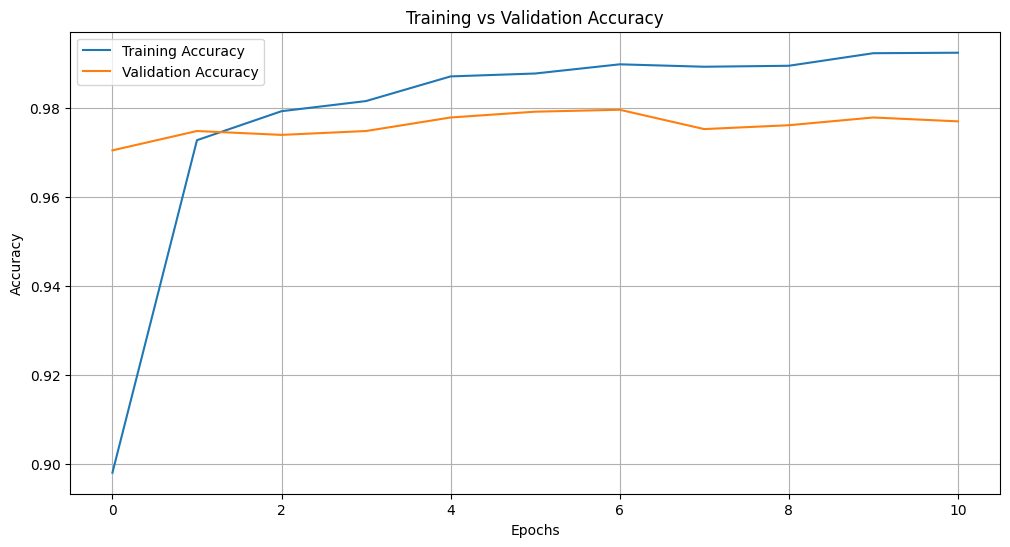

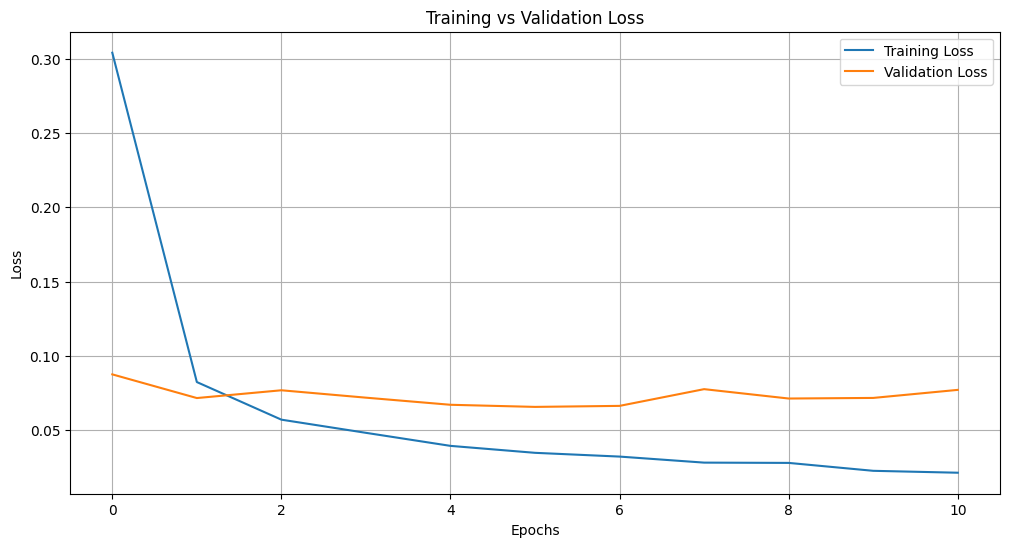

In [12]:
import matplotlib.pyplot as plt

# Plot Training and Validation Accuracy
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Plot Training and Validation Loss
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()
